## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('cubic_zirconia.csv',index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [6]:
df.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [7]:
df.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [8]:
df.shape

(26967, 10)

In [9]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [10]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
df.duplicated().sum()

34

In [12]:
df[df.duplicated()].sort_values(by='price')

,carat,cut,color,clarity,depth,table,x,y,z,price
19732,0.30,Good,J,VS1,63.4,57.0,4.23,4.26,2.69,394
20302,0.30,Ideal,H,SI1,62.2,57.0,4.26,4.29,2.66,450
18778,0.32,Premium,H,VS2,60.6,58.0,4.47,4.44,2.70,648
8145,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
25760,0.30,Ideal,G,IF,62.1,55.0,4.32,4.35,2.69,863
9819,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
13548,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
4757,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
25942,0.51,Premium,F,SI2,58.1,59.0,5.26,5.24,3.05,1052
14390,0.60,Premium,D,SI2,62.0,57.0,5.43,5.35,3.34,1196


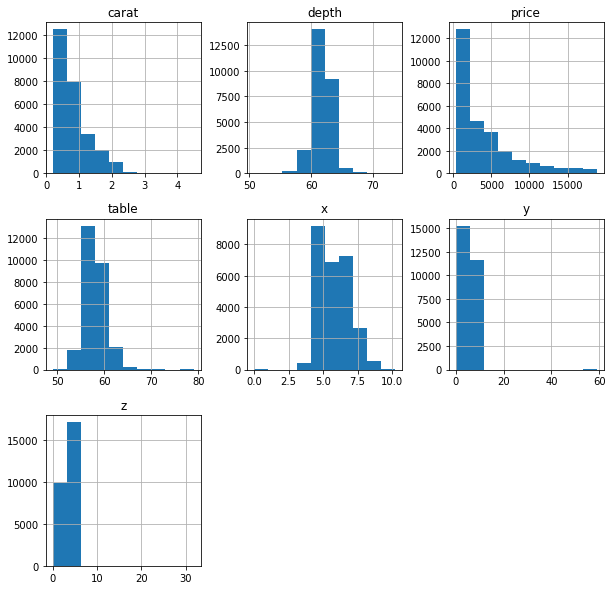

In [13]:
df.hist(figsize=(10,10))
plt.show()

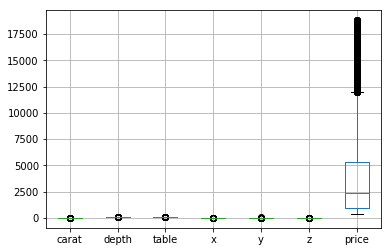

In [14]:
df.boxplot()

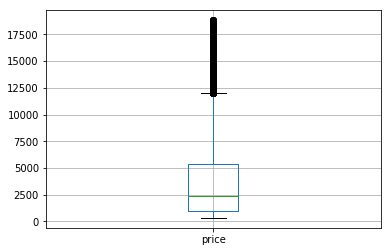

In [15]:
df.boxplot(column=['price'])

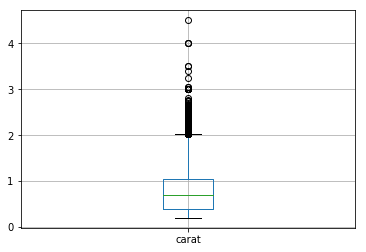

In [16]:
df.boxplot(column=['carat'])

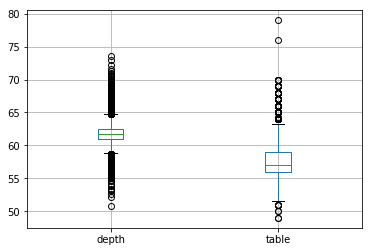

In [17]:
df.boxplot(column=['depth','table'])

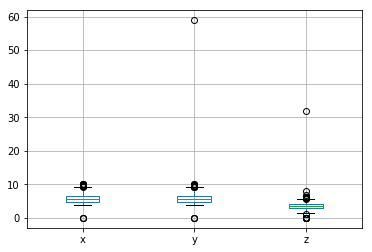

In [18]:
df.boxplot(column=['x','y','z'])

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


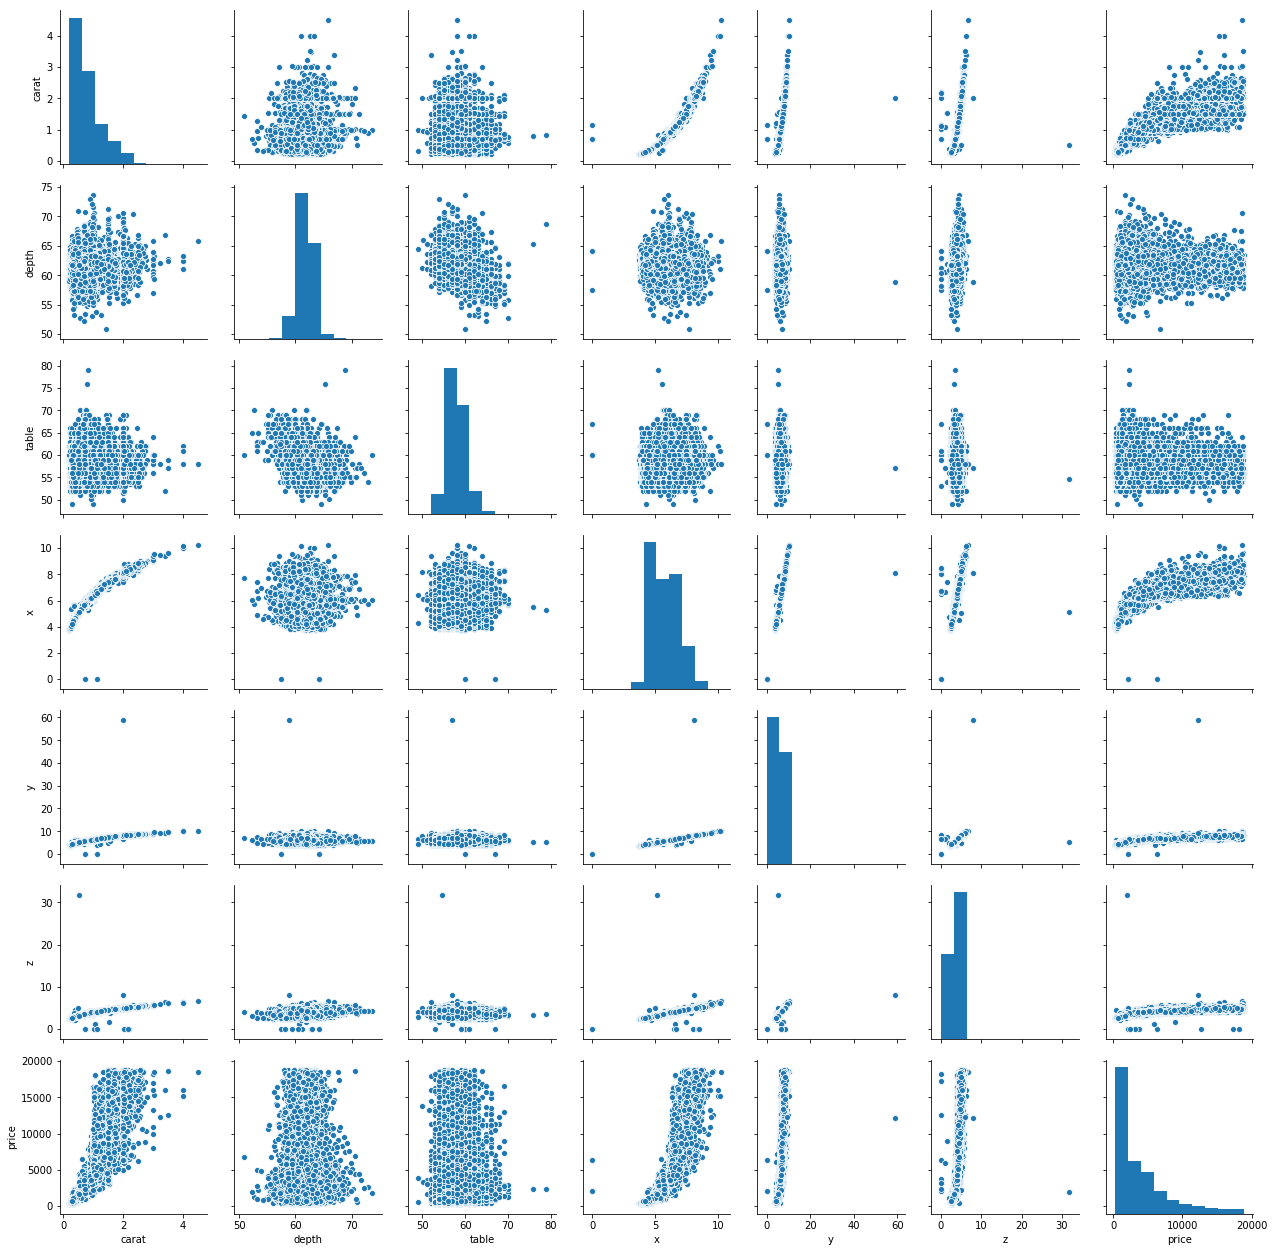

In [19]:
sns.pairplot(df)

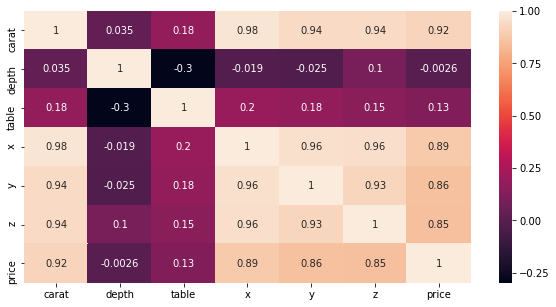

In [20]:
f,ax = plt.subplots(figsize =(10,5)) 
sns.heatmap(df.corr(), ax=ax,annot=True)

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [21]:
a=697/26967
print(a*100)


2.5846404865205623


In [22]:
median = df['depth'].median()
mean= df['depth'].mean()
print(mean,median)

61.745146555006194 61.8


In [23]:
median = df['depth'].median()
df['depth'] = df['depth'].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [24]:
# From the describe function we can see that 0 values are only present in column x, y, z

zero_X=df[(df['x']==0)]
zero_Y=df[(df['y']==0)]
zero_Z=df[(df['z']==0)]

In [25]:
zero_X

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [26]:
zero_Y

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [27]:
zero_Z.shape

(9, 10)

#### Since x,y and z represent the length width and height of the cubic zirconia, the values cannot be 0. Hence we will drop these cases

In [28]:
df_new=df.drop(zero_Z.index,axis=0)

In [29]:
zero_z=df_new[(df_new['z']==0)]
zero_z

,carat,cut,color,clarity,depth,table,x,y,z,price


In [30]:
# Since we have categorical data in the data frame, we will first convert these values to numerical data and then proceed to scale the data



#### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 1 to 26967
Data columns (total 10 columns):
carat      26958 non-null float64
cut        26958 non-null object
color      26958 non-null object
clarity    26958 non-null object
depth      26958 non-null float64
table      26958 non-null float64
x          26958 non-null float64
y          26958 non-null float64
z          26958 non-null float64
price      26958 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [32]:
for column in df_new[['cut','color','clarity']]:
    if df_new[column].dtype == 'object':
        df_new[column] = pd.Categorical(df_new[column]).codes

In [33]:
df_new.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 1 to 26967
Data columns (total 10 columns):
carat      26958 non-null float64
cut        26958 non-null int8
color      26958 non-null int8
clarity    26958 non-null int8
depth      26958 non-null float64
table      26958 non-null float64
x          26958 non-null float64
y          26958 non-null float64
z          26958 non-null float64
price      26958 non-null int64
dtypes: float64(6), int64(1), int8(3)
memory usage: 1.7 MB


In [35]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [36]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [37]:
for column in df_new[["cut","color","clarity"]]:
        print(column.upper(),': ',df_new[column].nunique())
        print(df_new[column].value_counts().sort_values())
        print('\n')

CUT :  5
0      780
1     2439
4     6030
3     6893
2    10816
Name: cut, dtype: int64


COLOR :  7
6    1443
5    2771
0    3344
4    4098
2    4727
1    4917
3    5658
Name: color, dtype: int64


CLARITY :  8
0     363
1     894
6    1839
7    2531
4    4092
3    4571
5    6098
2    6570
Name: clarity, dtype: int64




In [38]:
df.shape

(26967, 10)

In [39]:
df_new.shape

(26958, 10)

In [103]:
std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
df_new["carat"] = std_scale.fit_transform(df_new[["carat"]]) # returns z-scores of the values of the attribute
df_new["depth"] = std_scale.fit_transform(df_new[["depth"]]) # returns z-scores of the values of the attribute
df_new["table"] = std_scale.fit_transform(df_new[["table"]]) # returns z-scores of the values of the attribute
df_new["x"] = std_scale.fit_transform(df_new[["x"]]) # returns z-scores of the values of the attribute
df_new["y"] = std_scale.fit_transform(df_new[["y"]]) # returns z-scores of the values of the attribute
df_new["z"] = std_scale.fit_transform(df_new[["z"]]) # returns z-scores of the values of the attribute
df_new["price"] = std_scale.fit_transform(df_new[["price"]]) # returns z-scores of the values of the attribute

df_new

,carat,cut,color,clarity,depth,table,x,y,z,price
1,-1.043125,2,1,2,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
2,-0.980310,3,3,1,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
3,0.213173,4,1,7,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
4,-0.791865,2,2,4,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
5,-1.022187,2,2,6,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257
...,...,...,...,...,...,...,...,...,...,...
26963,0.652878,3,3,2,0.396869,0.244112,0.780954,0.675217,0.767265,0.365296
26964,-0.980310,2,4,1,0.109928,-1.100465,-1.145036,-1.128411,-1.113418,-0.701991
26965,-0.603421,3,1,5,-0.033542,0.244112,-0.541500,-0.501436,-0.514385,-0.567276
26966,-1.105940,4,2,7,0.038193,-0.652273,-1.366924,-1.317363,-1.308451,-0.809366


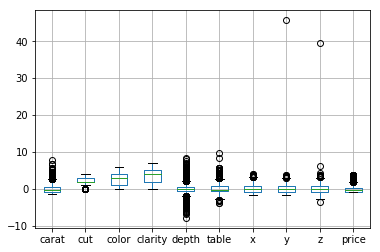

In [42]:
df_new.boxplot()

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for column in df_new.iloc[:, [0,4,5,6,7,8,9]].columns:
    lr,ur=remove_outlier(df_new[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

In [45]:
df_new

,carat,cut,color,clarity,depth,table,x,y,z,price
1,-1.043125,2,1,2,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
2,-0.980310,3,3,1,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
3,0.213173,4,1,7,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
4,-0.791865,2,2,4,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
5,-1.022187,2,2,6,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257
...,...,...,...,...,...,...,...,...,...,...
26963,0.652878,3,3,2,0.396869,0.244112,0.780954,0.675217,0.767265,0.365296
26964,-0.980310,2,4,1,0.109928,-1.100465,-1.145036,-1.128411,-1.113418,-0.701991
26965,-0.603421,3,1,5,-0.033542,0.244112,-0.541500,-0.501436,-0.514385,-0.567276
26966,-1.105940,4,2,7,0.038193,-0.652273,-1.366924,-1.317363,-1.308451,-0.809366


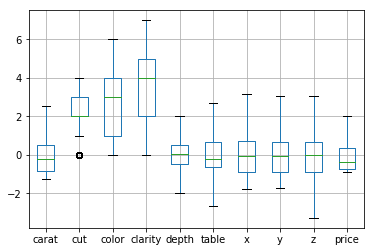

In [46]:
df_new.boxplot()

### Train and Test Split

In [47]:
# Copy all the predictor variables into X dataframe
X = df_new.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df_new[['price']]

In [48]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,-1.043125,2,1,2,0.253399,0.244112,-1.295920,-1.240065,-1.224865
2,-0.980310,3,3,1,-0.679158,0.244112,-1.162787,-1.094057,-1.169142
3,0.213173,4,1,7,0.325134,1.140496,0.275049,0.331668,0.335404
4,-0.791865,2,2,4,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936
5,-1.022187,2,2,6,-0.966099,0.692304,-1.224916,-1.119823,-1.238796


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

In [50]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.0971757631668482
The coefficient for cut is 0.009875514473363498
The coefficient for color is -0.05742139902202007
The coefficient for clarity is 0.06334547478622472
The coefficient for depth is -0.014217386467780549
The coefficient for table is -0.041000594044870935
The coefficient for x is -0.4533854940433483
The coefficient for y is 0.45357073623409644
The coefficient for z is -0.18584037417200444


In [52]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.15788715717114413


In [53]:
# R square on training data
regression_model.score(X_train, y_train)

0.9097498446214671

91% of the variation in the log_price is explained by the predictors in the model

In [54]:
regression_model.score(X_test, y_test)

0.9099618467277726

# Using stats model

In [55]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
6605,0.673816,3,4,4,-0.105277,0.244112,0.807580,-1.394661,0.223957,0.541023
18894,1.867300,3,2,5,-1.396509,1.140496,1.828266,1.723038,1.533469,1.998165
24460,-0.959372,1,2,4,-0.822628,2.485072,-1.127285,-0.982403,-1.113418,-0.805887
15928,0.443495,1,1,2,1.688101,0.692304,0.514688,0.529209,0.725472,0.114506
1947,2.568733,4,6,4,-1.539980,1.140496,2.644815,2.607675,2.327535,1.998165


In [56]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'


In [57]:

lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -0.157887
carat        1.097176
cut          0.009876
color       -0.057421
clarity      0.063345
depth       -0.014217
table       -0.041001
x           -0.453385
y            0.453571
z           -0.185840
dtype: float64

In [58]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.112e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:20:55   Log-Likelihood:                -1204.5
No. Observations:               18870   AIC:                             2429.
Df Residuals:                   18860   BIC:                             2507.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1579      0.007    -21.585      0.0

In [59]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
mse

price    0.06833
dtype: float64

In [60]:
import math

math.sqrt(mse)

0.26140101332900245

In [61]:
# Prediction on Test data
y_pred = regression_model.predict(X_test)

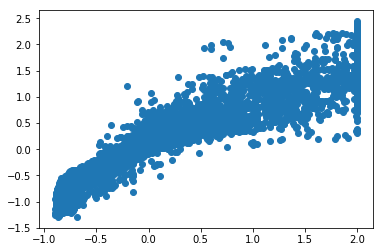

In [62]:
plt.scatter(y_test['price'], y_pred)

#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Refer report

## Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [63]:
holiday=pd.read_csv('Holiday_Package.csv')

In [64]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [65]:
holiday=holiday.drop('Unnamed: 0', axis=1)

In [66]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [67]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [68]:
holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [69]:
holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [70]:
holiday.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

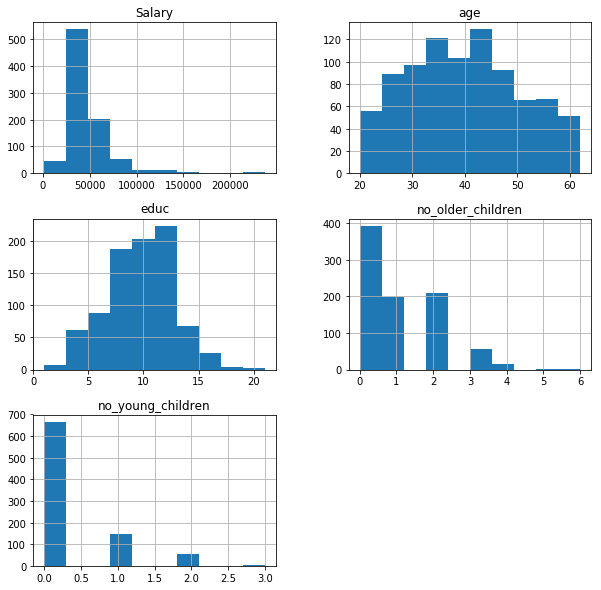

In [71]:
holiday.hist(figsize=(10,10))
plt.show()

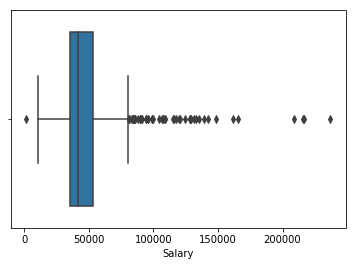

In [72]:
sns.boxplot(holiday["Salary"])

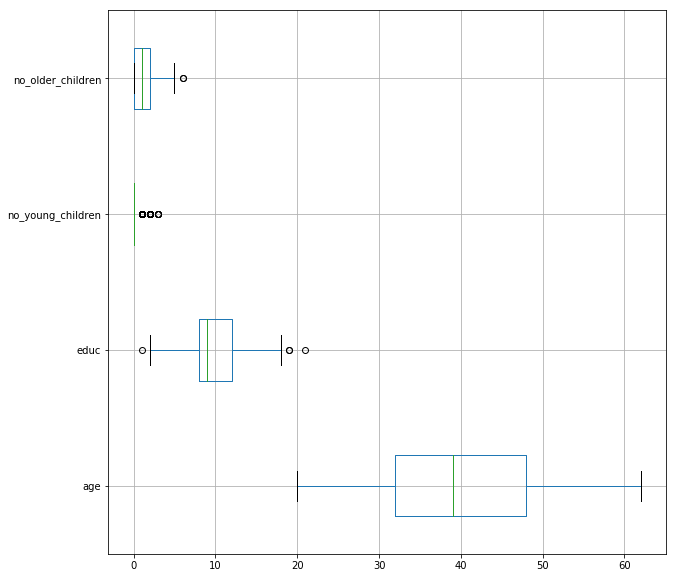

In [73]:
plt.figure(figsize=(10,10))
holiday.iloc[:, 2:6].boxplot(vert=0)

In [74]:
# Removing outliers

In [75]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [76]:
lr,ur=remove_outlier(holiday['Salary'])
holiday['Salary']=np.where(holiday['Salary']>ur,ur,holiday['Salary'])
holiday['Salary']=np.where(holiday['Salary']<lr,lr,holiday['Salary'])

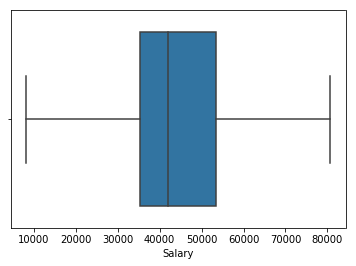

In [77]:
sns.boxplot(holiday["Salary"])

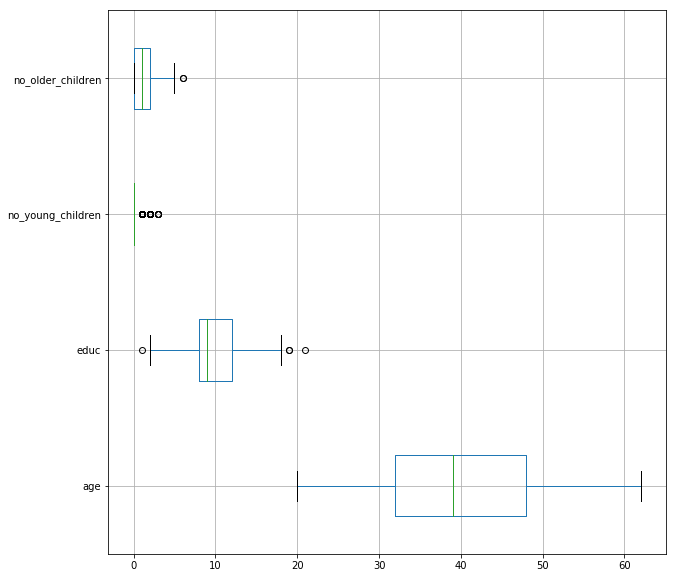

In [78]:
plt.figure(figsize=(10,10))
holiday.iloc[:, 2:6].boxplot(vert=0)

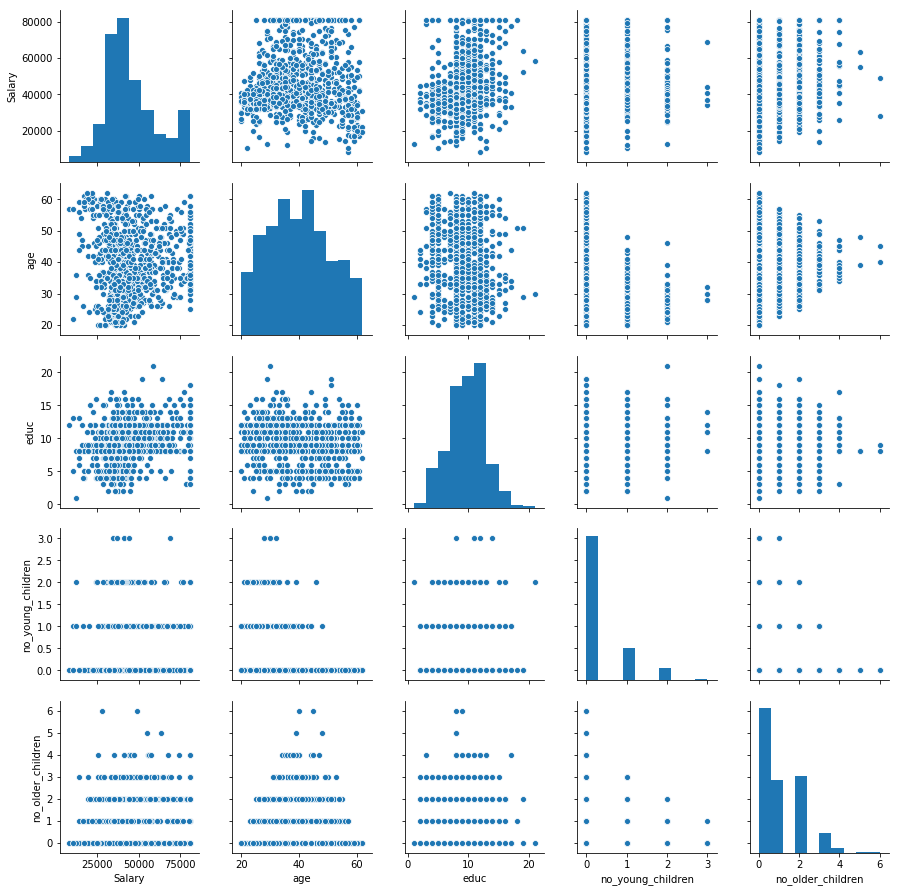

In [79]:
sns.pairplot(holiday)

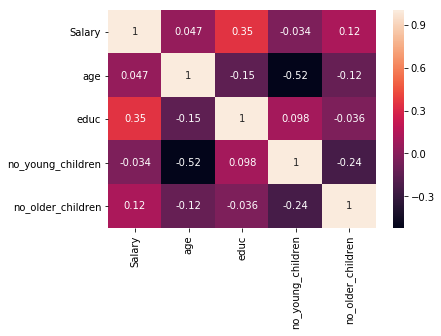

In [80]:
sns.heatmap(holiday.corr(),annot=True)

In [81]:
dups = holiday.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [82]:
holiday.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [83]:
from sklearn.linear_model import LogisticRegression

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [84]:
for column in holiday[['Holliday_Package','foreign']]:
    if holiday[column].dtype == 'object':
        holiday[column] = pd.Categorical(holiday[column]).codes

In [85]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [86]:
for feature in holiday.columns: 
    if holiday[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holiday[feature].unique()))
        print(pd.Categorical(holiday[feature].unique()).codes)
        holiday[feature] = pd.Categorical(holiday[feature]).codes

In [87]:
X = holiday.drop('Holliday_Package', axis=1)

y = holiday[['Holliday_Package']]

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=0)

## Logistic Regression

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [91]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.681763,0.318237
1,0.585187,0.414813
2,0.558584,0.441416
3,0.550155,0.449845
4,0.531079,0.468921


In [92]:
log_train_acc=model.score(X_train, y_train)
log_train_acc

0.5508196721311476

AUC: 0.591


Text(0, 0.5, 'True Positive Rate')

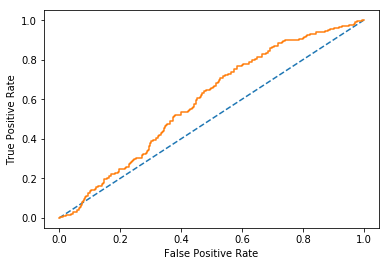

In [104]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [105]:
model.score(X_test, y_test)

0.48091603053435117

AUC: 0.591


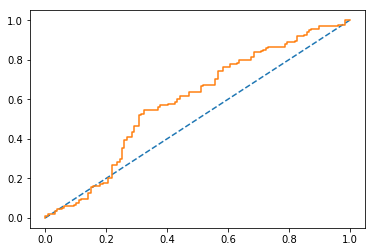

In [107]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr)

In [108]:
confusion_matrix(y_train, ytrain_predict)

array([[329,  15],
       [259,   7]])

In [109]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.56      0.96      0.71       344
           1       0.32      0.03      0.05       266

    accuracy                           0.55       610
   macro avg       0.44      0.49      0.38       610
weighted avg       0.45      0.55      0.42       610



In [110]:
log_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_train_metrics).transpose()
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
log_train_precision=round(df.loc["1"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.32
log_train_recall  0.03
log_train_f1  0.05


In [111]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[120,   7],
       [129,   6]])

In [112]:
log_test_acc=model.score(X_test,y_test)
log_test_acc

0.48091603053435117

In [113]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64       127
           1       0.46      0.04      0.08       135

    accuracy                           0.48       262
   macro avg       0.47      0.49      0.36       262
weighted avg       0.47      0.48      0.35       262



In [114]:
log_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(log_test_metrics).transpose()
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
log_test_precision=round(df.loc["1"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.46
log_test_recall  0.04
log_test_f1  0.08


# LDA Model



In [115]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [116]:
pred_class = model.predict(X)
holiday['Prediction'] = pred_class 
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Prediction
0,0,48412.0,30,8,1,1,0,0
1,1,37207.0,45,8,0,1,0,0
2,0,58022.0,46,9,0,0,0,0
3,0,66503.0,31,11,2,0,0,0
4,0,66734.0,44,12,0,2,0,0


In [117]:
confusion_matrix(y, pred_class)

array([[364, 107],
       [181, 220]])

In [118]:
lda_acc=model.score(X,y)
lda_acc

0.6697247706422018

In [127]:
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       471
           1       0.67      0.55      0.60       401

    accuracy                           0.67       872
   macro avg       0.67      0.66      0.66       872
weighted avg       0.67      0.67      0.66       872



In [120]:
lda_metrics=classification_report(y, pred_class,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_recall=round(df.loc["1"][1],2)
lda_f1=round(df.loc["1"][2],2)
lda_precision=round(df.loc["1"][0],2)
print ('lda_precision ',lda_precision)
print ('lda_recall ',lda_recall)
print ('lda_f1 ',lda_f1)

lda_precision  0.67
lda_recall  0.55
lda_f1  0.6


AUC: 0.728


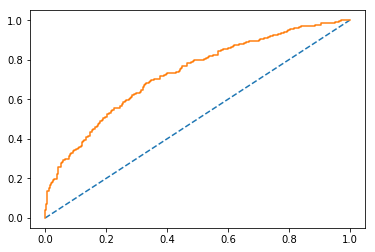

In [122]:
# predict probabilities
probs = model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_auc = roc_auc_score(y, probs)
print('AUC: %.3f' % lda_auc)
# calculate roc curve
lda_fpr, lda_tpr, lda_test_thresholds = roc_curve(y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr)

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.



In [123]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'LDA':[lda_acc,lda_auc,lda_recall,lda_precision,lda_f1]},index=index)
round(data,2)

,Log Train,Log Test,LDA
Accuracy,0.55,0.48,0.67
AUC,0.59,0.59,0.73
Recall,0.03,0.04,0.55
Precision,0.32,0.46,0.67
F1 Score,0.05,0.08,0.60


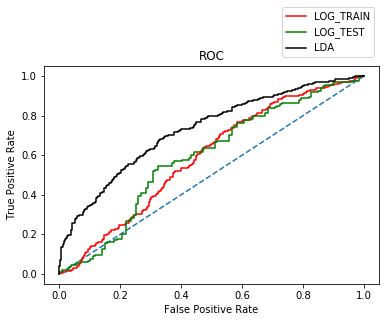

In [125]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="LOG_TRAIN")
plt.plot(log_test_fpr,log_test_tpr,color='green',label="LOG_TEST")
plt.plot(lda_fpr,lda_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Refer report